# Tasks

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import nltk

## Importing the book

In [3]:
book=[line.rstrip() for line in open ("Harry Potter and the Sorcerers Stone txt file.txt")]

In [4]:
book[:5]

["\x0cHarry Potter and the Sorcerer's Stone",
 'CHAPTER ONE',
 'THE BOY WHO LIVED',
 'Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say',
 'that they were perfectly normal, thank you very much. They were the last']

### No of lines in the book

In [5]:
len(book)

8183

### Datatype of variable storing book

In [6]:
type(book)

list

## Text Preprocessing

In [7]:
import string

For text preprocessing we are doing the following:<br>
    1. Removing chapter numbers and names<br>
    2. Removing page numbers<br>
    3. Removing anything that comes after the end along with the end<br>
    4. Joining them as a single string<br>
    5. Removing Punctuations

### First stage of Filtering

In [8]:
book_update1=[]
skip_next = False
for s in book:
    if "CHAPTER" in s:
        skip_next = True
    elif not skip_next:
        cleaned_string = ''.join([c for c in s if c not in string.punctuation])
        cleaned_string = cleaned_string.replace('\x0c', '')
        if cleaned_string.strip() and not (all(word.isdigit() for word in cleaned_string.split()) or "CHAPTER" in cleaned_string):
            book_update1.append(cleaned_string)
    else:
        skip_next = False 

In [9]:
book_update1[:5]

['Harry Potter and the Sorcerers Stone',
 'Mr and Mrs Dursley of number four Privet Drive were proud to say',
 'that they were perfectly normal thank you very much They were the last',
 'people youd expect to be involved in anything strange or mysterious',
 'because they just didnt hold with such nonsense']

Here we have filtered out page numbers, chapter name, chapter name and chapter number

### Updated no of lines of book after first stage of filtering

In [10]:
len(book_update1)

7571

### Second stage of filtering

In [11]:
book_update2=[]
found_end = False
for s in book_update1:
    if "THE END" in s:
        found_end = True
    if not found_end:
        cleaned_string = ''.join([c for c in s if c not in string.punctuation])
        if cleaned_string.strip():
            book_update2.append(cleaned_string)

In [12]:
book_update2[:5]

['Harry Potter and the Sorcerers Stone',
 'Mr and Mrs Dursley of number four Privet Drive were proud to say',
 'that they were perfectly normal thank you very much They were the last',
 'people youd expect to be involved in anything strange or mysterious',
 'because they just didnt hold with such nonsense']

Here we have filtered out any word that is after the end in the book

### Updated no of lines of book after second stage of filtering

In [13]:
len(book_update2)

7561

### Third stage of Filtering

In [14]:
book_update3=book_update2[1:len(book_update2)]

In [15]:
book_update3[:5]

['Mr and Mrs Dursley of number four Privet Drive were proud to say',
 'that they were perfectly normal thank you very much They were the last',
 'people youd expect to be involved in anything strange or mysterious',
 'because they just didnt hold with such nonsense',
 'Mr Dursley was the director of a firm called Grunnings which made']

Here we have removed the end as well from the string which was present and not needed.

### Last line of the book

In [16]:
book_update3[len(book_update3)-1]

'at home Im going to have a lot of fun with Dudley this summer'

### Combining all lines of book as one single string

In [17]:
book_string = (" ".join(book_update3)).lower()
book_string[:2000]

'mr and mrs dursley of number four privet drive were proud to say that they were perfectly normal thank you very much they were the last people youd expect to be involved in anything strange or mysterious because they just didnt hold with such nonsense mr dursley was the director of a firm called grunnings which made drills he was a big beefy man with hardly any neck although he did have a very large mustache mrs dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors the dursleys had a small son called dudley and in their opinion there was no finer boy anywhere the dursleys had everything they wanted but they also had a secret and their greatest fear was that somebody would discover it they didnt think they could bear it if anyone found out about the potters mrs potter was mrs dursleys sister but they hadnt met for several years in fact mrs dursley pretended 

### List of words in the book string

In [18]:
book_list=book_string.split()
book_list[:5]

['mr', 'and', 'mrs', 'dursley', 'of']

book_string is the single string of the flitered book and book_list is list of words in the filtered book

## Removing Stopwords and Tokenizing Words

In order to remove the stopwords and tokenizing words, stopword method and word_tokenize method inside nltk library is used 

### Importing stopward method 

In [19]:
from nltk.corpus import stopwords

### Initializing stopword set for english.

In [20]:
stop_words=set(stopwords.words('english'))

### Importing word tokenize method

In [21]:
from nltk.tokenize import word_tokenize

### Tokenizing words in the book string

In [22]:
book_tokenized=[]
for text in book_list:
    words = word_tokenize(text)
    book_tokenized.append(words)

In [23]:
book_tokenized[:5]

[['mr'], ['and'], ['mrs'], ['dursley'], ['of']]

All the words of the book are tokenized here

### Removing stop words from the book string

In [24]:
book_nostopwords=[]
for tokens in book_tokenized:
    nostopwords = [word for word in tokens if word.lower() not in stop_words]
    book_nostopwords.append(nostopwords)

In [25]:
book_nostopwords[:5]

[['mr'], [], ['mrs'], ['dursley'], []]

In [26]:
book_nostopwords2 = [lst for lst in book_nostopwords if lst]
book_nostopwords2[:5]

[['mr'], ['mrs'], ['dursley'], ['number'], ['four']]

All the stop words are removed from the tokenized words list.

## Frequency Distribution of words

Here we are using FreqDist method inside nltk to get frequency distribution of each word and plotting 25 most frequent words

### Finding Frequency Distribution of words

In [27]:
book_words = [word for sublist in book_nostopwords2 for word in sublist]
book_fdist = nltk.FreqDist(book_words)
print(book_fdist.most_common(10))

[('harry', 1213), ('said', 794), ('ron', 410), ('hagrid', 336), ('back', 261), ('hermione', 257), ('one', 253), ('got', 206), ('didnt', 195), ('could', 195)]


These are the 10 most common words used in the book excluding stop words

### Plotting Frequency Distrubution of words

In [28]:
common_words = book_fdist.most_common(30)
words, frequencies = zip(*common_words)
freq=list(frequencies)
wrds=list(words)

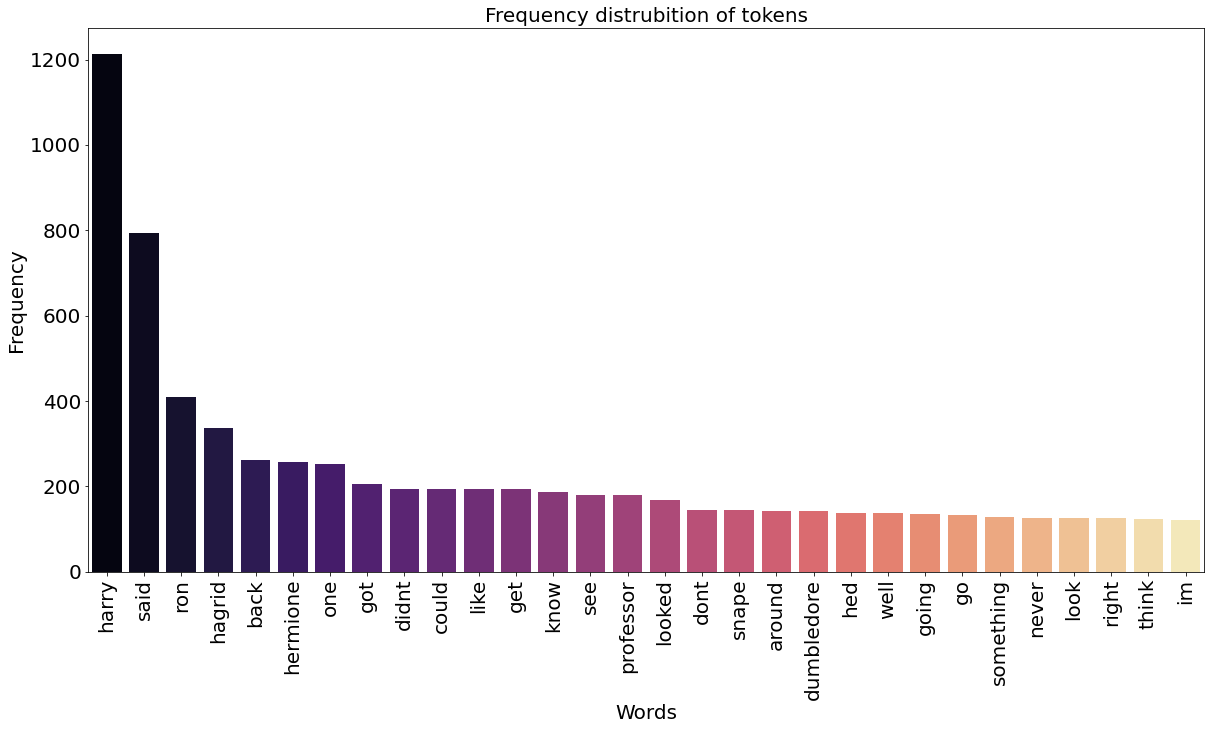

In [29]:
plt.figure(figsize=(20,10))
sns.barplot(x=wrds,y=freq,palette="magma")
plt.title('Frequency distrubition of tokens',fontdict={'size':20})
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('Words',fontdict={'size':20})
plt.ylabel('Frequency',fontdict={'size':20})
plt.show()

25 Most Frequent used words in the book are plotted using seaborn plot.

## Creating WordCloud with Stop Words

Here we will first take the string containing all the words of the books including stop words and use wordcloud library to create a wordcloud.

### Importing Word Cloud

In [30]:
from wordcloud import WordCloud

### Generating Word Cloud

In [31]:
wc = WordCloud(
    width=800,
    height=600,
    background_color='white',
    min_font_size=10,
    stopwords={},
    colormap='winter',
).generate(book_string)

### Plotting Word Cloud

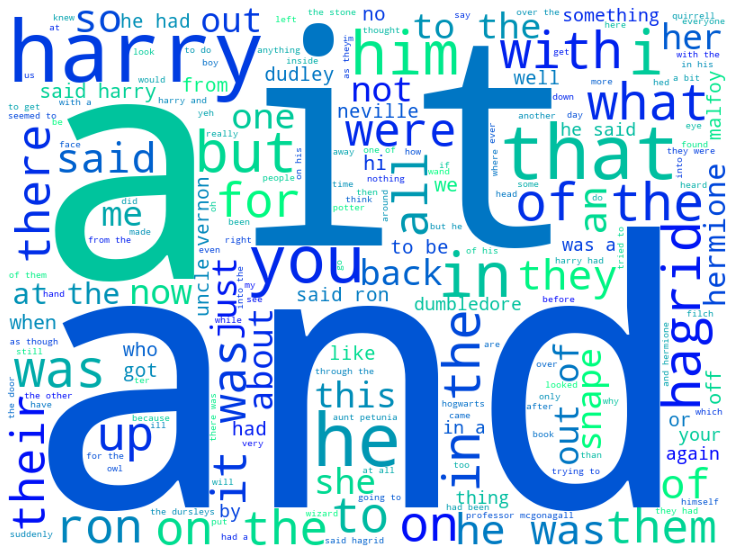

In [32]:
plt.figure(figsize=(10,8),facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Here we have the wordcloud

## Creating WordCloud without Stop Words

Here we will first take the string containing all the words of the books except stop words and use wordcloud library to create a wordcloud.

### Creating string without stop words

In [33]:
book_combined_string = ' '.join([' '.join(sublist) for sublist in book_nostopwords2])
book_combined_string[:2000]

'mr mrs dursley number four privet drive proud say perfectly normal thank much last people youd expect involved anything strange mysterious didnt hold nonsense mr dursley director firm called grunnings made drills big beefy man hardly neck although large mustache mrs dursley thin blonde nearly twice usual amount neck came useful spent much time craning garden fences spying neighbors dursleys small son called dudley opinion finer boy anywhere dursleys everything wanted also secret greatest fear somebody would discover didnt think could bear anyone found potters mrs potter mrs dursleys sister hadnt met several years fact mrs dursley pretended didnt sister sister goodfornothing husband undursleyish possible dursleys shuddered think neighbors would say potters arrived street dursleys knew potters small son never even seen boy another good reason keeping potters away didnt want dudley mixing child like mr mrs dursley woke dull gray tuesday story starts nothing cloudy sky outside suggest str

Here we have a string containing all the words of the book leaving stop words

### Generating Word Cloud

In [34]:
wc = WordCloud(
    width=800,
    height=600,
    background_color='white',
    min_font_size=10,
    stopwords={},
    colormap='winter',
).generate(book_combined_string)

### Plotting Word Cloud

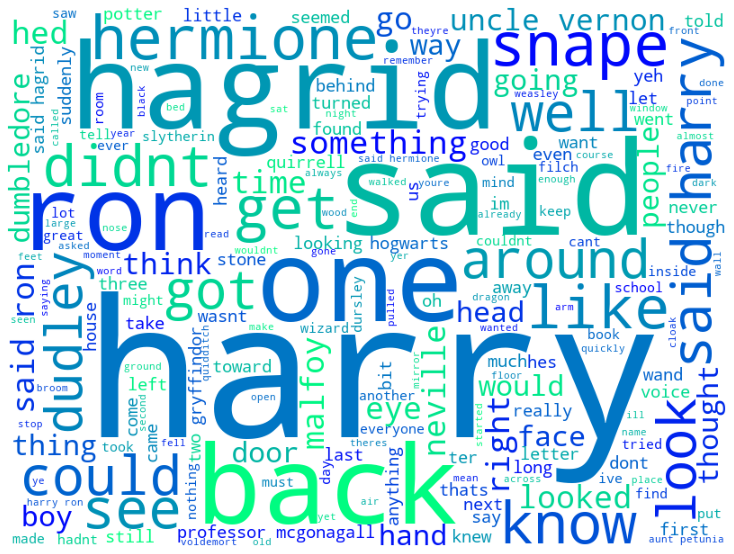

In [35]:
plt.figure(figsize=(10,8),facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Here we have the word cloud

## POS Tagging

Here we will be using Penn Treebank POS tagger to tag the words in the entire book with the help of pos_tag method in the nltk library and plot the most frequent used tags in the book

### Tokenizing words in book string

In [38]:
book_string_3 = (" ".join(book_update3))
book_words = word_tokenize(book_string_3)

### Applying POS Tagging

In [39]:
book_tagged_pos_tags = nltk.pos_tag(book_words)  

### POS Tagging of first ten words in the book string

In [40]:
book_tagged_pos_tags[:10]

[('Mr', 'NNP'),
 ('and', 'CC'),
 ('Mrs', 'NNP'),
 ('Dursley', 'NNP'),
 ('of', 'IN'),
 ('number', 'NN'),
 ('four', 'CD'),
 ('Privet', 'NNP'),
 ('Drive', 'NNP'),
 ('were', 'VBD')]

Here we have POS tagging of first 10 words of the book

### Frequency Distribution of Tag Method

In [41]:
def tag_distribution(tagged):
    tag_freq = nltk.FreqDist(tag for word, tag in tagged)
    return tag_freq

### Applying Frequency Distribution of Tag Method in the book string

In [42]:
book_tag_freq_penn = tag_distribution(book_tagged_pos_tags)

### Plotting Frequency Distribution of Tags

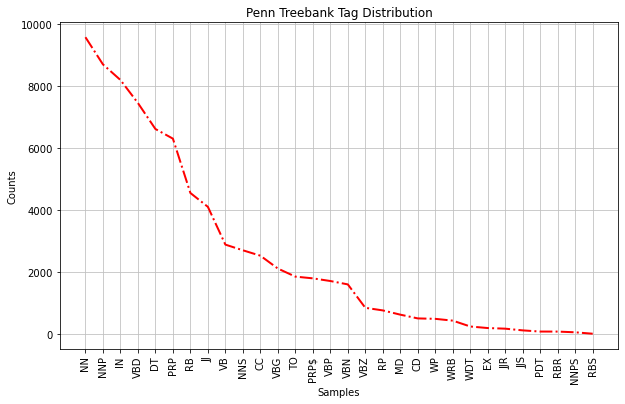

In [44]:
plt.figure(figsize=(10, 6))
book_tag_freq_penn.plot(30, title='Penn Treebank Tag Distribution',linestyle='-.',color='red')
plt.show()

Here we have the matplotlib plot of the most used 30 tags in the book.

## Bigram Table

We have seventeenth chapter as the longest and so we would be calculating bigram values and creating a bigram table based on that chapter using bigram method in the nltk library

### Generating book string with stop words

In [45]:
import re
book_text = " ".join(book)
book_text = book_text.replace("\'", "'")
page_number_pattern = r'\d+|[^A-Za-z0-9\s]'
book_text = re.sub(page_number_pattern, '', book_text)
book_text[:2000]

'\x0cHarry Potter and the Sorcerers Stone CHAPTER ONE THE BOY WHO LIVED Mr and Mrs Dursley of number four Privet Drive were proud to say that they were perfectly normal thank you very much They were the last people youd expect to be involved in anything strange or mysterious because they just didnt hold with such nonsense Mr Dursley was the director of a firm called Grunnings which made drills He was a big beefy man with hardly any neck although he did have a very large mustache Mrs Dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere The Dursleys had everything they wanted but they also had a secret and their greatest fear was that somebody would discover it They didnt think they could bear it if anyone found out about the Potters Mrs Potter was Mrs Dursleys sis

### Finding Chapter Seventeen

In [46]:
chapter_seventeen_start = book_text.find("CHAPTER SEVENTEEN")

### Creating a string containing Chapter Seventeen

In [47]:
if chapter_seventeen_start != -1:
    next_chapter_start = book_text.find("CHAPTER", chapter_seventeen_start + 1)
    if next_chapter_start == -1:
        next_chapter_start = book_text.find("THE END", chapter_seventeen_start + 1)
    chapter_seventeen_text = book_text[chapter_seventeen_start:next_chapter_start]
    chapter_seventeen_cleaned = chapter_seventeen_text.replace('\x0c', '')
else:
    print("Chapter Seventeen not found in the text.")

In [48]:
chapter_seventeen_cleaned_2=chapter_seventeen_cleaned[41:]
chapter_seventeen_cleaned_2[:2000]

'It was Quirrell You gasped Harry Quirrell smiled His face wasnt twitching at all Me he said calmly I wondered whether Id be meeting you here Potter But I thought  Snape  Severus Quirrell laughed and it wasnt his usual quivering treble either but cold and sharp Yes Severus does seem the type doesnt he So useful to have him swooping around like an overgrown bat Next to him who would suspect pppoor ststuttering PProfessor Quirrell Harry couldnt take it in This couldnt be true it couldnt But Snape tried to kill me No no no I tried to kill you Your friend Miss Granger accidentally knocked me over as she rushed to set fire to Snape at that Quidditch match She broke my eye contact with you Another few seconds and Id have got you off that broom Id have managed it before then if Snape hadnt been muttering a countercurse trying to save you Snape was trying to save me Of course said Quirrell coolly Why do you think he wanted to referee your next match He was trying to make sure I didnt do it aga

Here we have the 17th chapter of the book which we got after removing page numbers, chapter names and chapter numbers

### Importing Bigram Method

In [49]:
from nltk.util import bigrams

### Tokenizing words of Chapter Seventeen

In [50]:
chapter_seventeen_words = nltk.word_tokenize(chapter_seventeen_cleaned_2)

### Finding Bigrams of words in Chapter Seventeen

In [51]:
bi_grams = list(bigrams(chapter_seventeen_words))

### Finding frequency distribution of Bigram in Chapter Seventeen

In [52]:
bigram_freq = nltk.FreqDist(bi_grams)

### Finding conditional frequency distribution of Bigram in Chapter Seventeen

In [53]:
cfd = nltk.ConditionalFreqDist(bi_grams)

### Initializing Bigram table

In [54]:
bigram_df = pd.DataFrame(index=set(chapter_seventeen_words for chapter_seventeen_words, _ in bigram_freq.keys()),
                         columns=set(chapter_seventeen_words for _, chapter_seventeen_words in bigram_freq.keys()))

### Putting values in Bigram table

In [55]:
word_freq = nltk.FreqDist(chapter_seventeen_words)
bigram_probabilities = {}
for first_word in bigram_df.index:
    for second_word in bigram_df.columns:
        conditional_freq = cfd[first_word][second_word]
        first_word_count = word_freq[first_word]
        probability = float(conditional_freq) / (first_word_count)
        bigram_probabilities[first_word, second_word] = probability
        bigram_df.at[first_word, second_word] = probability

### Filling NULL Values in Bigram Table

In [56]:
bigram_df = bigram_df.fillna(0)

### Sorting rows and columns based on frequency of words

In [57]:
word_freq = nltk.FreqDist(chapter_seventeen_words)
word_order = sorted(word_freq, key=word_freq.get, reverse=True)
bigram_df = bigram_df.loc[word_order, word_order]

### Bigram Table

In [58]:
print(bigram_df)

                the        to       and         I     Harry         a  \
the        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
to         0.093750  0.000000  0.000000  0.000000  0.006250  0.000000   
and        0.046875  0.007812  0.000000  0.023438  0.007812  0.007812   
I          0.000000  0.000000  0.000000  0.000000  0.009615  0.000000   
Harry      0.000000  0.011628  0.011628  0.000000  0.011628  0.000000   
...             ...       ...       ...       ...       ...       ...   
grin       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
spreading  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
home       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
lot        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
fun        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                 he       was      you       his  ...  holiday  uncertainly  \
the        0.000000  0.000000  0.00000  0.00

This is the bigram probability table of words used in seventeenth chapter of the book

Extra: I am also finding pair of words with maximum bigram probabilities.

These pair of words have maximum bigram probability.

### Bigrams and their bigram probabilities

In [60]:
bigram_probabilities

{('Fred', 'Fred'): 0.0,
 ('Fred', 'invented'): 0.0,
 ('Fred', 'chat'): 0.0,
 ('Fred', 'strict'): 0.0,
 ('Fred', 'Absolutely'): 0.0,
 ('Fred', 'gradually'): 0.0,
 ('Fred', 'hear'): 0.0,
 ('Fred', 'give'): 0.0,
 ('Fred', 'merely'): 0.0,
 ('Fred', 'might'): 0.0,
 ('Fred', 'remorse'): 0.0,
 ('Fred', 'magic'): 0.0,
 ('Fred', 'thus'): 0.0,
 ('Fred', 'tied'): 0.0,
 ('Fred', 'agreed'): 0.0,
 ('Fred', 'Curse'): 0.0,
 ('Fred', 'vapor'): 0.0,
 ('Fred', 'yesterday'): 0.0,
 ('Fred', 'stunned'): 0.0,
 ('Fred', 'door'): 0.0,
 ('Fred', 'KILL'): 0.0,
 ('Fred', 'pound'): 0.0,
 ('Fred', 'her'): 0.0,
 ('Fred', 'feasts'): 0.0,
 ('Fred', 'beaming'): 0.0,
 ('Fred', 'Christmas'): 0.0,
 ('Fred', 'course'): 0.0,
 ('Fred', 'white'): 0.0,
 ('Fred', 'have'): 0.0,
 ('Fred', 'idly'): 0.0,
 ('Fred', 'evening'): 0.0,
 ('Fred', 'heavens'): 0.0,
 ('Fred', 'air'): 0.0,
 ('Fred', 'goldenbrown'): 0.0,
 ('Fred', 'rare'): 0.0,
 ('Fred', 'along'): 0.0,
 ('Fred', 'inside'): 0.0,
 ('Fred', 'voice'): 0.0,
 ('Fred', 'nothing'): 0

These are the list of pair of words and their bigram probabilities which will be used later in Shannon's Game

## Shannon's Game

Here we are gonna take the tenth chapyter of the book and try to play shannon's game using words used in that chapter to write correct sentences based on the bigram probabilities calculated for entire book

### Bigram Matrix of entire book

In [68]:
bi_grams_2 = list(bigrams(book_words))
bigram_freq = nltk.FreqDist(bi_grams_2)
cfd_2 = nltk.ConditionalFreqDist(bi_grams_2)
bigram_df_2 = pd.DataFrame(index=set(book_words for book_words, _ in bigram_freq.keys()),
                         columns=set(book_words for _, book_words in bigram_freq.keys()))
word_freq_2 = nltk.FreqDist(book_words)
bigram_probabilities_2 = {}
for first_word in bigram_df_2.index:
    for second_word in bigram_df_2.columns:
        conditional_freq = cfd_2[first_word][second_word]
        first_word_count = word_freq_2[first_word]
        probability = float(conditional_freq) / (first_word_count)
        bigram_probabilities_2[first_word, second_word] = probability
        bigram_df_2.at[first_word, second_word] = probability
bigram_df_2 = bigram_df_2.fillna(0)
print(bigram_df_2)

            WIZARDRY  bucking  Snowy  pieces  Fred  CONK  personal  spells  \
WIZARDRY         0.0      0.0    0.0     0.0   0.0   0.0       0.0     0.0   
bucking          0.0      0.0    0.0     0.0   0.0   0.0       0.0     0.0   
Snowy            0.0      0.0    0.0     0.0   0.0   0.0       0.0     0.0   
pieces           0.0      0.0    0.0     0.0   0.0   0.0       0.0     0.0   
Fred             0.0      0.0    0.0     0.0   0.0   0.0       0.0     0.0   
...              ...      ...    ...     ...   ...   ...       ...     ...   
shouldn          0.0      0.0    0.0     0.0   0.0   0.0       0.0     0.0   
worse            0.0      0.0    0.0     0.0   0.0   0.0       0.0     0.0   
work             0.0      0.0    0.0     0.0   0.0   0.0       0.0     0.0   
reflection       0.0      0.0    0.0     0.0   0.0   0.0       0.0     0.0   
relaxed          0.0      0.0    0.0     0.0   0.0   0.0       0.0     0.0   

            Pansy  strict  ...  although  exploded  shrink  sco

### Bigram and their bigram for entire book

In [69]:
bigram_probabilities_2

{('WIZARDRY', 'WIZARDRY'): 0.0,
 ('WIZARDRY', 'bucking'): 0.0,
 ('WIZARDRY', 'Snowy'): 0.0,
 ('WIZARDRY', 'pieces'): 0.0,
 ('WIZARDRY', 'Fred'): 0.0,
 ('WIZARDRY', 'CONK'): 0.0,
 ('WIZARDRY', 'personal'): 0.0,
 ('WIZARDRY', 'spells'): 0.0,
 ('WIZARDRY', 'Pansy'): 0.0,
 ('WIZARDRY', 'strict'): 0.0,
 ('WIZARDRY', 'squeezed'): 0.0,
 ('WIZARDRY', 'Absolutely'): 0.0,
 ('WIZARDRY', 'goodness'): 0.0,
 ('WIZARDRY', 'circled'): 0.0,
 ('WIZARDRY', 'toasting'): 0.0,
 ('WIZARDRY', 'confessed'): 0.0,
 ('WIZARDRY', 'random'): 0.0,
 ('WIZARDRY', 'merely'): 0.0,
 ('WIZARDRY', 'crashes'): 0.0,
 ('WIZARDRY', 'marched'): 0.0,
 ('WIZARDRY', 'sneakers'): 0.0,
 ('WIZARDRY', 'remorse'): 0.0,
 ('WIZARDRY', 'warmth'): 0.0,
 ('WIZARDRY', 'twigs'): 0.0,
 ('WIZARDRY', 'ravine'): 0.0,
 ('WIZARDRY', 'coldly'): 0.0,
 ('WIZARDRY', 'pierced'): 0.0,
 ('WIZARDRY', 'Makes'): 0.0,
 ('WIZARDRY', 'magic'): 0.0,
 ('WIZARDRY', 'thus'): 0.0,
 ('WIZARDRY', 'Curse'): 0.0,
 ('WIZARDRY', 'Malkins'): 0.0,
 ('WIZARDRY', 'safest'): 0

### Guess method

In [70]:
def make_guess(previous_word, bigram_probabilities):
    next_word_probabilities = {word: prob for (prev, word), prob in bigram_probabilities.items() if prev == previous_word}
    sorted_guesses = sorted(next_word_probabilities, key=next_word_probabilities.get, reverse=True)
    return sorted_guesses


This function will return the sorted list of most likely to least likely word based on the previous word in order to improve guessing.

### Shannon's Game method

In [71]:

def play_shannons_game(existing_string, bigram_probabilities):
    s=""
    print("Welcome to Shannon's Game!")
    print("Think of a word, and I will try to guess it based on the provided string.")
    print("Please respond with 'yes' or 'no' to my guesses.")
    print("You can end the game by typing 'exit'.")

    previous_word = input("Think of a starting word: ")
    print(f"Starting word: {previous_word}")
    s=s+" "+previous_word
    while True:
        guesses = make_guess(previous_word, bigram_probabilities)
        for guess in guesses:
            response = input(f"Is it '{guess}'? (yes/no): ")
            if response == 'yes':
                previous_word = guess
                s=s+" "+guess
                print(f"Sentence: {s}")
                break
            elif response == 'exit':
                print("Thanks for playing!")
                return
        else:
            print("No more guesses. Thanks for playing!")
            return

This is the shannon's game method which will be used to try to play fill in the blanks.

### Finding chapter ten

In [72]:
chapter_ten_start = book_text.find("CHAPTER TEN")

### Creating a string containing chapter 10

In [73]:
if chapter_ten_start != -1:
    next_chapter_start = book_text.find("CHAPTER", chapter_ten_start + 1)
    if next_chapter_start == -1:
        next_chapter_start = book_text.find("THE END", chapter_ten_start + 1)
    chapter_ten_text = book_text[chapter_ten_start:next_chapter_start]
    chapter_ten_cleaned = chapter_ten_text.replace('\x0c', '')
else:
    print("Chapter Two not found in the text.")

In [74]:
chapter_ten_cleaned_2=chapter_ten_cleaned[22:]
chapter_ten_cleaned_2[:2000]

'Malfoy couldnt believe his eyes when he saw that Harry and Ron were still at Hogwarts the next day looking tired but perfectly cheerful Indeed by the next morning Harry and Ron thought that meeting the threeheaded dog had been an excellent adventure and they were quite keen to have another one In the meantime Harry filled Ron in about the package that seemed to have been moved from Gringotts to Hogwarts and they spent a lot of time wondering what could possibly need such heavy protection Its either really valuable or really dangerous said Ron Or both said Harry But as all they knew for sure about the mysterious object was that it was about two inches long they didnt have much chance of guessing what it was without further clues Neither Neville nor Hermione showed the slightest interest in what lay underneath the dog and the trapdoor All Neville cared about was never going near the dog again Hermione was now refusing to speak to Harry and Ron but she was such a bossy knowitall that the

This is chapter 10 of the book

### Playing Shannon's game (Attempt 1)

In [77]:
play_shannons_game(chapter_ten_cleaned_2, bigram_probabilities_2) 

Welcome to Shannon's Game!
Think of a word, and I will try to guess it based on the provided string.
Please respond with 'yes' or 'no' to my guesses.
You can end the game by typing 'exit'.
Think of a starting word: Its
Starting word: Its
Is it 'not'? (yes/no): no
Is it 'the'? (yes/no): no
Is it 'just'? (yes/no): no
Is it 'a'? (yes/no): no
Is it 'obvious'? (yes/no): no
Is it 'an'? (yes/no): no
Is it 'all'? (yes/no): no
Is it 'really'? (yes/no): no
Is it 'about'? (yes/no): no
Is it 'almost'? (yes/no): no
Is it 'its'? (yes/no): no
Is it 'gettin'? (yes/no): no
Is it 'either'? (yes/no): yes
Sentence:  Its either
Is it 'of'? (yes/no): no
Is it 'end'? (yes/no): no
Is it 'side'? (yes/no): no
Is it 'It'? (yes/no): no
Is it 'Snape'? (yes/no): no
Is it 'but'? (yes/no): no
Is it 'with'? (yes/no): no
Is it 'Harry'? (yes/no): no
Is it 'it'? (yes/no): no
Is it 'The'? (yes/no): no
Is it 'really'? (yes/no): yes
Sentence:  Its either really
Is it 'wanted'? (yes/no): no
Is it 'knows'? (yes/no): no
Is it 

Here we have tried to play Shannon's game to write "Its either really valuable or really dangerous said Ron"

### Playing Shannon Game (Attempt 2)

In [78]:
play_shannons_game(chapter_ten_cleaned_2, bigram_probabilities_2) 

Welcome to Shannon's Game!
Think of a word, and I will try to guess it based on the provided string.
Please respond with 'yes' or 'no' to my guesses.
You can end the game by typing 'exit'.
Think of a starting word: Or
Starting word: Or
Is it 'have'? (yes/no): no
Is it 'both'? (yes/no): yes
Sentence:  Or both
Is it 'of'? (yes/no): no
Is it 'hands'? (yes/no): no
Is it 'looked'? (yes/no): no
Is it 'said'? (yes/no): yes
Sentence:  Or both said
Is it 'Harry'? (yes/no): yes
Sentence:  Or both said Harry
Is it 'and'? (yes/no): exit
Thanks for playing!


Here we have tried to play shannon's game to write "Or both said Harry"

### Playing Shannon Game (Attempt 3)

In [79]:
play_shannons_game(chapter_ten_cleaned_2, bigram_probabilities_2) 

Welcome to Shannon's Game!
Think of a word, and I will try to guess it based on the provided string.
Please respond with 'yes' or 'no' to my guesses.
You can end the game by typing 'exit'.
Think of a starting word: All
Starting word: All
Is it 'right'? (yes/no): no
Is it 'the'? (yes/no): no
Is it 'three'? (yes/no): no
Is it 'they'? (yes/no): no
Is it 'Harrys'? (yes/no): no
Is it 'Neville'? (yes/no): yes
Sentence:  All Neville
Is it 'was'? (yes/no): no
Is it 'had'? (yes/no): no
Is it 'and'? (yes/no): no
Is it 'Longbottom'? (yes/no): no
Is it 'who'? (yes/no): no
Is it 'you'? (yes/no): no
Is it 'Harry'? (yes/no): no
Is it 'said'? (yes/no): no
Is it 'the'? (yes/no): no
Is it 'needed'? (yes/no): no
Is it 'indeed'? (yes/no): no
Is it 'dropped'? (yes/no): no
Is it 'lay'? (yes/no): no
Is it 'went'? (yes/no): no
Is it 'cared'? (yes/no): yes
Sentence:  All Neville cared
Is it 'about'? (yes/no): yes
Sentence:  All Neville cared about
Is it 'the'? (yes/no): no
Is it 'it'? (yes/no): no
Is it 'to'? 

Is it 'size'? (yes/no): no
Is it 'plant'? (yes/no): no
Is it 'two'? (yes/no): no
Is it 'open'? (yes/no): no
Is it 'stands'? (yes/no): no
Is it 'station'? (yes/no): no
Is it 'corridors'? (yes/no): no
Is it 'old'? (yes/no): no
Is it 'trapdoor'? (yes/no): no
Is it 'students'? (yes/no): no
Is it 'owls'? (yes/no): no
Is it 'hospital'? (yes/no): no
Is it 'road'? (yes/no): no
Is it 'bottom'? (yes/no): no
Is it 'trolls'? (yes/no): no
Is it 'barrier'? (yes/no): no
Is it 'rock'? (yes/no): no
Is it 'spot'? (yes/no): no
Is it 'stool'? (yes/no): no
Is it 'holidays'? (yes/no): no
Is it 'compartment'? (yes/no): no
Is it 'path'? (yes/no): no
Is it 'platform'? (yes/no): no
Is it 'card'? (yes/no): no
Is it 'High'? (yes/no): no
Is it 'darkness'? (yes/no): no
Is it 'lead'? (yes/no): no
Is it 'hut'? (yes/no): no
Is it 'goal'? (yes/no): no
Is it 'dogs'? (yes/no): no
Is it 'lock'? (yes/no): no
Is it 'zoo'? (yes/no): no
Is it 'clearing'? (yes/no): no
Is it 'thing'? (yes/no): no
Is it 'unicorn'? (yes/no): no
I

Here we have tried to play shannon's game to write "All Neville cared about was never going near the dog again"

### Playing Shannon Game (Attempt 4)

In [81]:
play_shannons_game(chapter_ten_cleaned_2, bigram_probabilities_2) 

Welcome to Shannon's Game!
Think of a word, and I will try to guess it based on the provided string.
Please respond with 'yes' or 'no' to my guesses.
You can end the game by typing 'exit'.
Think of a starting word: A
Starting word: A
Is it 'few'? (yes/no): no
Is it 'History'? (yes/no): no
Is it 'sudden'? (yes/no): no
Is it 'little'? (yes/no): no
Is it 'magic'? (yes/no): no
Is it 'Nimbus'? (yes/no): yes
Sentence:  A Nimbus
Is it 'Two'? (yes/no): yes
Sentence:  A Nimbus Two
Is it 'Thousand'? (yes/no): yes
Sentence:  A Nimbus Two Thousand
Is it 'Magical'? (yes/no): no
Is it 'Ron'? (yes/no): yes
Sentence:  A Nimbus Two Thousand Ron
Is it 'and'? (yes/no): no
Is it 'in'? (yes/no): no
Is it 'was'? (yes/no): no
Is it 'had'? (yes/no): no
Is it 'said'? (yes/no): no
Is it 'muttered'? (yes/no): no
Is it 'but'? (yes/no): no
Is it 'He'? (yes/no): no
Is it 'were'? (yes/no): no
Is it 'Harry'? (yes/no): no
Is it 'didnt'? (yes/no): no
Is it 'to'? (yes/no): no
Is it 'who'? (yes/no): no
Is it 'looked'? (y

Here we have tried to play shannon's game to write "A Nimbus Two Thousand Ron moaned enviously"

### Playing Shannon Game (Attempt 5)

In [82]:
play_shannons_game(chapter_ten_cleaned_2, bigram_probabilities_2) 

Welcome to Shannon's Game!
Think of a word, and I will try to guess it based on the provided string.
Please respond with 'yes' or 'no' to my guesses.
You can end the game by typing 'exit'.
Think of a starting word: Ive
Starting word: Ive
Is it 'got'? (yes/no): no
Is it 'never'? (yes/no): yes
Sentence:  Ive never
Is it 'been'? (yes/no): no
Is it 'seen'? (yes/no): no
Is it 'had'? (yes/no): no
Is it 'even'? (yes/no): yes
Sentence:  Ive never even
Is it 'if'? (yes/no): no
Is it 'though'? (yes/no): no
Is it 'more'? (yes/no): no
Is it 'a'? (yes/no): no
Is it 'notice'? (yes/no): no
Is it 'deeper'? (yes/no): no
Is it 'remember'? (yes/no): no
Is it 'one'? (yes/no): no
Is it 'seen'? (yes/no): no
Is it 'when'? (yes/no): no
Is it 'know'? (yes/no): no
Is it 'have'? (yes/no): no
Is it 'lasted'? (yes/no): no
Is it 'smaller'? (yes/no): no
Is it 'wondered'? (yes/no): no
Is it 'get'? (yes/no): no
Is it 'scratch'? (yes/no): no
Is it 'Dudley'? (yes/no): no
Is it 'got'? (yes/no): no
Is it 'but'? (yes/no): 

Here we have tried to play shannon's game to write "I've never even touched one."

### Playing Shannon Game (Attempt 6)

In [83]:
play_shannons_game(chapter_ten_cleaned_2, bigram_probabilities_2) 

Welcome to Shannon's Game!
Think of a word, and I will try to guess it based on the provided string.
Please respond with 'yes' or 'no' to my guesses.
You can end the game by typing 'exit'.
Think of a starting word: Malfoy
Starting word: Malfoy
Is it 'had'? (yes/no): no
Is it 'and'? (yes/no): no
Is it 'Crabbe'? (yes/no): no
Is it 'who'? (yes/no): no
Is it 'looked'? (yes/no): no
Is it 'Harry'? (yes/no): no
Is it 'quickly'? (yes/no): no
Is it 'was'? (yes/no): no
Is it 'didnt'? (yes/no): no
Is it 'Neville'? (yes/no): no
Is it 'in'? (yes/no): no
Is it 'one'? (yes/no): no
Is it 'a'? (yes/no): no
Is it 'snapped'? (yes/no): no
Is it 'Ron'? (yes/no): no
Is it 'said'? (yes/no): no
Is it 'using'? (yes/no): no
Is it 'saying'? (yes/no): no
Is it 'went'? (yes/no): no
Is it 'burst'? (yes/no): no
Is it 'has'? (yes/no): no
Is it 'Still'? (yes/no): no
Is it 'Catch'? (yes/no): no
Is it 'And'? (yes/no): no
Is it 'leapt'? (yes/no): no
Is it 'whom'? (yes/no): no
Is it 'Tonight'? (yes/no): no
Is it 'tricked'

Is it 'blood'? (yes/no): no
Is it 'girl'? (yes/no): no
Is it 'sign'? (yes/no): no
Is it 'reptile'? (yes/no): no
Is it 'words'? (yes/no): no
Is it 'wild'? (yes/no): no
Is it 'purple'? (yes/no): no
Is it 'egg'? (yes/no): no
Is it 'youngest'? (yes/no): no
Is it 'ropes'? (yes/no): no
Is it 'twelve'? (yes/no): no
Is it 'tables'? (yes/no): no
Is it 'light'? (yes/no): no
Is it 'poor'? (yes/no): no
Is it 'point'? (yes/no): no
Is it 'doormat'? (yes/no): no
Is it 'green'? (yes/no): no
Is it 'tree'? (yes/no): no
Is it 'Christmas'? (yes/no): no
Is it 'big'? (yes/no): no
Is it 'line'? (yes/no): no
Is it 'cheek'? (yes/no): no
Is it 'Underground'? (yes/no): no
Is it 'tower'? (yes/no): no
Is it 'village'? (yes/no): no
Is it 'wizard'? (yes/no): no
Is it 'food'? (yes/no): no
Is it 'cliff'? (yes/no): no
Is it 'roof'? (yes/no): no
Is it 'counter'? (yes/no): no
Is it 'dungeon'? (yes/no): no
Is it 'Ministry'? (yes/no): no
Is it 'waist'? (yes/no): no
Is it 'tallest'? (yes/no): no
Is it 'more'? (yes/no): no
I

Here we have tried to play shannon's game to write "Malfoy seized the package from Harry and felt it."

### Playing Shannon Game (Attempt 7)

In [84]:
play_shannons_game(chapter_ten_cleaned_2, bigram_probabilities_2) 

Welcome to Shannon's Game!
Think of a word, and I will try to guess it based on the provided string.
Please respond with 'yes' or 'no' to my guesses.
You can end the game by typing 'exit'.
Think of a starting word: Ron
Starting word: Ron
Is it 'and'? (yes/no): no
Is it 'in'? (yes/no): no
Is it 'was'? (yes/no): no
Is it 'had'? (yes/no): no
Is it 'said'? (yes/no): no
Is it 'muttered'? (yes/no): no
Is it 'but'? (yes/no): no
Is it 'He'? (yes/no): no
Is it 'were'? (yes/no): no
Is it 'Harry'? (yes/no): no
Is it 'didnt'? (yes/no): no
Is it 'to'? (yes/no): no
Is it 'who'? (yes/no): no
Is it 'looked'? (yes/no): no
Is it 'whispered'? (yes/no): no
Is it 'I'? (yes/no): no
Is it 'asked'? (yes/no): no
Is it 'went'? (yes/no): no
Is it 'thought'? (yes/no): no
Is it 'moaned'? (yes/no): no
Is it 'stared'? (yes/no): no
Is it 'looking'? (yes/no): no
Is it 'The'? (yes/no): no
Is it 'sighed'? (yes/no): no
Is it 'couldnt'? (yes/no): yes
Sentence:  Ron couldnt
Is it 'see'? (yes/no): no
Is it 'have'? (yes/no):

Here we have tried to play shannon's game to write "Ron couldn't resist it."

### Playing Shannon Game (Attempt 8)

In [85]:
play_shannons_game(chapter_ten_cleaned_2, bigram_probabilities_2)

Welcome to Shannon's Game!
Think of a word, and I will try to guess it based on the provided string.
Please respond with 'yes' or 'no' to my guesses.
You can end the game by typing 'exit'.
Think of a starting word: Not
Starting word: Not
Is it 'a'? (yes/no): no
Is it 'until'? (yes/no): no
Is it 'to'? (yes/no): no
Is it 'if'? (yes/no): no
Is it 'Slytherin'? (yes/no): no
Is it 'arguing'? (yes/no): yes
Sentence:  Not arguing
Is it 'What'? (yes/no): no
Is it 'I'? (yes/no): yes
Sentence:  Not arguing I
Is it 'dont'? (yes/no): no
Is it 'think'? (yes/no): no
Is it 'know'? (yes/no): no
Is it 'was'? (yes/no): no
Is it 'suppose'? (yes/no): no
Is it 'have'? (yes/no): no
Is it 'can'? (yes/no): no
Is it 'want'? (yes/no): no
Is it 'cant'? (yes/no): no
Is it 'mean'? (yes/no): no
Is it 'got'? (yes/no): no
Is it 'told'? (yes/no): no
Is it 'thought'? (yes/no): no
Is it 'bet'? (yes/no): no
Is it 'could'? (yes/no): no
Is it 'see'? (yes/no): no
Is it 'hope'? (yes/no): yes
Sentence:  Not arguing I hope
Is i

Here we have tried to play shannon's game to write  "Not arguing I hope boys he squeaked"


### Playing Shannon Game (Attempt 9)

In [86]:
play_shannons_game(chapter_ten_cleaned_2, bigram_probabilities_2)

Welcome to Shannon's Game!
Think of a word, and I will try to guess it based on the provided string.
Please respond with 'yes' or 'no' to my guesses.
You can end the game by typing 'exit'.
Think of a starting word: Potters
Starting word: Potters
Is it 'Mrs'? (yes/no): no
Is it 'thats'? (yes/no): no
Is it 'away'? (yes/no): no
Is it 'in'? (yes/no): no
Is it 'If'? (yes/no): no
Is it 'smiled'? (yes/no): no
Is it 'obviously'? (yes/no): no
Is it 'coming'? (yes/no): no
Is it 'safe'? (yes/no): no
Is it 'going'? (yes/no): no
Is it 'been'? (yes/no): yes
Sentence:  Potters been
Is it 'a'? (yes/no): no
Is it 'in'? (yes/no): no
Is it 'trying'? (yes/no): no
Is it 'to'? (yes/no): no
Is it 'quite'? (yes/no): no
Is it 'so'? (yes/no): no
Is it 'looking'? (yes/no): no
Is it 'thinking'? (yes/no): no
Is it 'knocked'? (yes/no): no
Is it 'given'? (yes/no): no
Is it 'caught'? (yes/no): no
Is it 'sent'? (yes/no): yes
Sentence:  Potters been sent
Is it 'it'? (yes/no): no
Is it 'him'? (yes/no): no
Is it 'up'? (y

Here we have tried to play shannon's game to write "Potters been sent a broomstick Professor said Malfoy quickly"

### Playing Shannon Game (Attempt 10)

In [89]:
play_shannons_game(chapter_ten_cleaned_2, bigram_probabilities_2)

Welcome to Shannon's Game!
Think of a word, and I will try to guess it based on the provided string.
Please respond with 'yes' or 'no' to my guesses.
You can end the game by typing 'exit'.
Think of a starting word: Wingardium
Starting word: Wingardium
Is it 'Leviosa'? (yes/no): yes
Sentence:  Wingardium Leviosa
Is it 'Their'? (yes/no): exit
Thanks for playing!


Here we have tried to play shannon's game to write "Wingardium Leviosa"